In [44]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import os

In [11]:
file_path = r"C:\Users\msi\Desktop\workspace\001_현대자동차\improved_CcGAN\RC-49\RC-49_128x128\CcGAN-improved\scripts\datasets\RC-49_128x128_downscale.h5"

hf = h5py.File(file_path, "r")
hf.keys()

<KeysViewHDF5 ['images', 'indx_train', 'indx_valid', 'labels', 'types']>

In [29]:
images_original = hf["images"][:]
labels_original = hf["labels"][:]
types_original = hf["types"][:]

types_original = types_original[:, None]

In [30]:
labels_new = np.concatenate([labels_original, types_original], axis=-1)
labels_new.shape

(264894, 3)

In [32]:
hf.close()

In [53]:
df = pd.DataFrame(labels_new, columns=["angle", "ratio", "type"])
df.head()

,angle,ratio,type
0,0.0,1.0,0.0
1,0.0,1.0,1.0
2,0.0,1.0,2.0
3,0.0,1.0,3.0
4,0.0,1.0,4.0


In [54]:
num_images = images_original.shape[0]

s = pd.Series(np.arange(num_images))
s = s.map(lambda x: f"{x+1}".zfill(len(str(num_images)))) + ".png"

In [55]:
df = pd.concat([s, df], axis=1)
df.columns = ["file_name"] + list(df.columns[-3:])
df.head()

,file_name,angle,ratio,type
0,000001.png,0.0,1.0,0.0
1,000002.png,0.0,1.0,1.0
2,000003.png,0.0,1.0,2.0
3,000004.png,0.0,1.0,3.0
4,000005.png,0.0,1.0,4.0


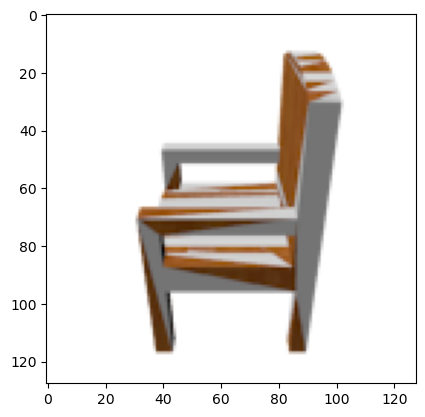

In [43]:
plt.imshow(np.transpose(images_original[0], (1,2,0)))
plt.show()

In [45]:
folder_name = r"./RC-49_128x128_diffusion"
os.makedirs(folder_name, exist_ok=True)
for i in range(num_images):
    name_to_save = f"{i+1}".zfill(len(str(num_images))) + ".png"
    img = Image.fromarray(np.transpose(images_original[i], (1,2,0)))
    each_path = os.path.join(folder_name, name_to_save)
    img.save(each_path)

In [56]:
csv_name = "metadata.csv"
df.to_csv(os.path.join(folder_name, csv_name), header=True, index=False)